In [1]:
%reset
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('first_25000_rows.csv')

In [3]:
df.head()

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,...,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
0,2024-10-21T11:54:29.221230963Z,2024-10-21T11:54:29.221064336Z,10,2,38,C,B,1,233.62,2,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
1,2024-10-21T11:54:29.223936626Z,2024-10-21T11:54:29.223769812Z,10,2,38,A,B,0,233.67,2,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
2,2024-10-21T11:54:29.225196809Z,2024-10-21T11:54:29.225030400Z,10,2,38,A,B,0,233.67,3,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
3,2024-10-21T11:54:29.712600612Z,2024-10-21T11:54:29.712434212Z,10,2,38,A,B,2,233.52,200,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
4,2024-10-21T11:54:29.764839221Z,2024-10-21T11:54:29.764673165Z,10,2,38,C,B,2,233.52,200,...,155,1,7,233.25,234.13,55,400,2,1,AAPL


In [4]:
df['symbol'].unique()

array(['AAPL'], dtype=object)

In [5]:
lvl = range(10)  # depth 0 … 9
cols = (['ts_event'] +  # timestamp of the book event
        [f'bid_sz_{i:02d}' for i in lvl] +
        [f'ask_sz_{i:02d}' for i in lvl] +
        [f'bid_px_{i:02d}' for i in lvl] +
        [f'ask_px_{i:02d}' for i in lvl] +
        [f'bid_ct_{i:02d}' for i in lvl] +
        [f'ask_ct_{i:02d}' for i in lvl]
        )

df.sort_values("ts_event")
df.reset_index(drop=True)

# if ts_event is ns-precision integer → convert to pandas datetime
df["ts_event"] = pd.to_datetime(df["ts_event"], unit="ns")
df.set_index("ts_event")  # convenient later

,ts_recv,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,...,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
ts_event,,,,,,,,,,,,,,,,,,,,,
2024-10-21 11:54:29.221064336+00:00,2024-10-21T11:54:29.221230963Z,10,2,38,C,B,1,233.62,2,130,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
2024-10-21 11:54:29.223769812+00:00,2024-10-21T11:54:29.223936626Z,10,2,38,A,B,0,233.67,2,130,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
2024-10-21 11:54:29.225030400+00:00,2024-10-21T11:54:29.225196809Z,10,2,38,A,B,0,233.67,3,130,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
2024-10-21 11:54:29.712434212+00:00,2024-10-21T11:54:29.712600612Z,10,2,38,A,B,2,233.52,200,130,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
2024-10-21 11:54:29.764673165+00:00,2024-10-21T11:54:29.764839221Z,10,2,38,C,B,2,233.52,200,130,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-21 13:04:16.583527688+00:00,2024-10-21T13:04:16.583694069Z,10,2,38,A,B,2,233.46,200,130,...,105,1,2,233.25,234.50,55,63,2,4,AAPL
2024-10-21 13:04:17.976461017+00:00,2024-10-21T13:04:17.976627074Z,10,2,38,A,A,1,233.69,200,130,...,105,1,2,233.25,234.50,55,63,2,4,AAPL
2024-10-21 13:04:20.085638629+00:00,2024-10-21T13:04:20.085804687Z,10,2,38,C,B,2,233.46,200,130,...,105,2,2,233.24,234.50,1,63,1,4,AAPL


In [6]:
def order_flow_level(side, m):
    """Return OF at level m for either 'bid' or 'ask' side."""
    p = df[f"{side}_px_{m:02d}"]
    q = df[f"{side}_sz_{m:02d}"]
    dp = p.diff()
    dq = q.diff()

    if side == "bid":
        of = np.where(dp > 0, q,  # price improved
                      np.where(dp == 0, dq,  # same price, size change
                               -q))  # price deteriorated
    else:  # 'ask'
        of = np.where(dp < 0, -q,  # price improved (ask ↓)
                      np.where(dp == 0, dq,
                               q))  # price deteriorated (ask ↑)
    return pd.Series(of, index=df.index)


for m in lvl:
    df[f"of_bid_{m:02d}"] = order_flow_level("bid", m)
    df[f"of_ask_{m:02d}"] = order_flow_level("ask", m)
    df[f"ofi_{m:02d}"] = df[f"of_bid_{m:02d}"] - df[f"of_ask_{m:02d}"]

# Best Level OFI
df["ofi_best"] = df["ofi_00"]
# Multi-Level OFI for each row
df[[f"ofi_{m:02d}" for m in lvl]]

,ofi_00,ofi_01,ofi_02,ofi_03,ofi_04,ofi_05,ofi_06,ofi_07,ofi_08,ofi_09
0,-339.0,-11.0,-208.0,-178.0,-44.0,-135.0,-210.0,-154.0,-255.0,-455.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,200.0,15.0,109.0,10.0,45.0,110.0,100.0,55.0
4996,0.0,-200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,-15.0,-109.0,-10.0,-45.0,-110.0,-100.0,-55.0,-1.0
4998,0.0,0.0,0.0,200.0,109.0,10.0,45.0,110.0,100.0,55.0


In [8]:
# ---------------  accumulate over a fixed horizon  ------------
# multi-level OFI over 1 minute

h = "1min"  # "1min" as in the paper
ofi_cols = [f"ofi_{m:02d}" for m in lvl]

# Eq. 2 in the paper
ofi_h = (df
         .set_index("ts_event")
         [ofi_cols]
         .resample(h).sum()
         .dropna())

# Calculate Q in Eq. 3
ofi_depth_cols = [f"depth_{m:02d}" for m in lvl]
for m in lvl:
    df[f'depth_{m:02d}'] = df[f"bid_sz_{m:02d}"] + df[f"ask_sz_{m:02d}"]

avg_depth = df.set_index("ts_event")[ofi_depth_cols].resample(h).mean().dropna().mean(axis=1)

# Normalize Multi-Level OFI
normalized_ofi_h = ofi_h.div(avg_depth/2, axis=0)
normalized_ofi_h

,ofi_00,ofi_01,ofi_02,ofi_03,ofi_04,ofi_05,ofi_06,ofi_07,ofi_08,ofi_09
ts_event,,,,,,,,,,
2024-10-21 11:54:00+00:00,-0.667227,2.974722,0.463352,-0.852568,-1.362256,-6.533267,-2.353830,-0.806233,-7.617511,-7.849187
2024-10-21 11:55:00+00:00,-13.082748,23.191725,12.327797,-0.681297,-1.657209,-3.296005,-5.072902,1.095600,-4.842734,7.678404
2024-10-21 11:56:00+00:00,1.204593,-5.356790,18.370047,0.136886,-0.474537,-2.993232,1.131588,-5.274658,4.270831,-4.991762
2024-10-21 11:57:00+00:00,-1.737662,14.867649,0.345759,11.853337,2.349390,0.301431,-7.234348,8.945413,-4.548064,7.154557
2024-10-21 11:58:00+00:00,1.716427,-2.596422,6.072839,3.763941,-5.184131,15.029624,-10.725488,-3.528694,-8.163917,-20.205042
...,...,...,...,...,...,...,...,...,...,...
2024-10-21 13:00:00+00:00,-0.958336,2.831695,-2.041202,-11.240149,22.886373,-2.079103,2.349819,-9.881152,14.699906,-7.368903
2024-10-21 13:01:00+00:00,1.451691,-1.387880,-10.092706,15.910103,-2.552423,11.661382,-9.757700,-1.308117,2.983144,-11.246613
2024-10-21 13:02:00+00:00,-29.387033,23.957954,12.973191,17.724566,29.550874,2.666132,13.293425,6.002521,-28.821039,11.714598


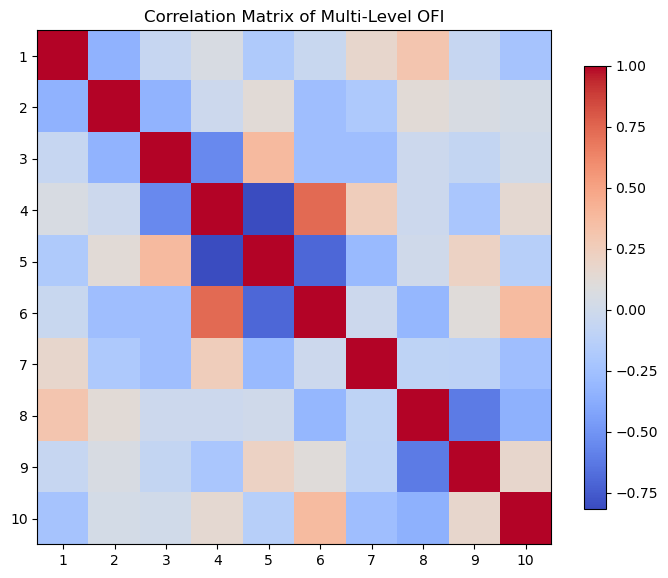

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# --- compute correlation matrix ----------------------------------------
corr = ofi_h[ofi_cols].corr()

# --- plot with matplotlib ----------------------------------------------
fig, ax = plt.subplots(figsize=(7, 6))
im = ax.imshow(corr, cmap='coolwarm')
ax.set_xticks(lvl)
ax.set_yticks(lvl)
ax.set_xticklabels(range(1, 11))
ax.set_yticklabels(range(1, 11))
ax.set_title("Correlation Matrix of Multi-Level OFI")
fig.colorbar(im, ax=ax, shrink=0.8)
plt.tight_layout()
plt.savefig('corr.png')
plt.show()


In [141]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
normalized_ofi_h["ofi_integrated"] = pca.fit_transform(normalized_ofi_h[ofi_cols])[:, 0]
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.components_)


[54.52599255]
[0.37318059]
[[-0.18832061  0.23279422  0.42221487  0.52610622  0.5183732   0.27068501
   0.20883274  0.15699236  0.16879181  0.12868374]]


In [172]:
df['mid_price'] = .5 * (df[f"bid_px_00"] + df[f"ask_px_00"])
average_price_min = df.set_index("ts_event")['mid_price'].resample(h).last()
average_price_min
log_ret = np.log(average_price_min / average_price_min.shift(1))
ret_bp = 1e4 * log_ret
ret_bp

ts_event
2024-10-21 11:54:00+00:00         NaN
2024-10-21 11:55:00+00:00   -2.139678
2024-10-21 11:56:00+00:00    0.427972
2024-10-21 11:57:00+00:00    1.283807
2024-10-21 11:58:00+00:00    0.641842
                               ...   
2024-10-21 13:00:00+00:00   -1.924208
2024-10-21 13:01:00+00:00   -3.635625
2024-10-21 13:02:00+00:00   -9.201897
2024-10-21 13:03:00+00:00    3.424951
2024-10-21 13:04:00+00:00   -3.639049
Freq: T, Name: mid_price, Length: 71, dtype: float64